In [7]:
import pandas as pd

df_Chuvas_Taio = pd.read_csv('Dados/chuva-taio.txt', sep=',', names=['data', 'hora', 'taioChuvas'])
df_Chuvas_RioDoSul = pd.read_csv('Dados/chuva-riodosul.txt', sep=',', names=['data', 'hora', 'riodoSulChuvas'])
df_Chuvas_Ituporanga = pd.read_csv('Dados/chuva-ituporanga.txt', sep=',', names=['data', 'hora', 'ituporangaChuvas'])
df_Niveis_Taio = pd.read_csv('Dados/nivel-taio.txt', sep=',', names=['data', 'hora', 'taioNivel'])
df_Niveis_RioDoSul = pd.read_csv('Dados/nivel-riodosul.txt', sep=',', names=['data', 'hora', 'rioDoSulNivel'])
df_Niveis_Ituporanga = pd.read_csv('Dados/nivel-ituporanga.txt', sep=',', names=['data', 'hora', 'ituporangaNivel'])

# junção dos data frames
df_niveis_totais = df_Niveis_Taio
df_niveis_totais = pd.merge(df_niveis_totais, df_Niveis_Ituporanga)
df_niveis_totais = pd.merge(df_niveis_totais, df_Niveis_RioDoSul)
df_niveis_totais = pd.merge(df_niveis_totais, df_Chuvas_Taio)
df_niveis_totais = pd.merge(df_niveis_totais, df_Chuvas_Ituporanga)
df_niveis_totais = pd.merge(df_niveis_totais, df_Chuvas_RioDoSul)
df_niveis_totais = df_niveis_totais.dropna()

In [8]:
df_niveis_totais

,data,hora,taioNivel,ituporangaNivel,rioDoSulNivel,taioChuvas,ituporangaChuvas,riodoSulChuvas
16,31/07/2005,21:00:00,98.0,30.0,171.0,0.0,3.0,0.0
17,31/07/2005,22:00:00,98.0,39.0,171.0,0.0,12.0,0.0
18,31/07/2005,23:00:00,97.0,59.0,171.0,0.0,19.0,0.0
19,01/08/2005,00:00:00,97.0,82.0,170.0,0.0,5.0,0.0
22,01/08/2005,03:00:00,97.0,27.0,170.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
113701,24/02/2014,15:30:00,142.0,87.0,174.0,0.0,0.0,0.0
113732,25/02/2014,01:15:00,152.0,54.0,180.0,0.0,0.0,0.0
113734,25/02/2014,01:45:00,152.0,54.0,179.0,0.0,0.0,0.0
113737,25/02/2014,02:30:00,151.0,54.0,178.0,0.0,0.0,0.0


array([[<AxesSubplot: title={'center': 'taioNivel'}>,
        <AxesSubplot: title={'center': 'ituporangaNivel'}>],
       [<AxesSubplot: title={'center': 'rioDoSulNivel'}>,
        <AxesSubplot: title={'center': 'taioChuvas'}>],
       [<AxesSubplot: title={'center': 'ituporangaChuvas'}>,
        <AxesSubplot: title={'center': 'riodoSulChuvas'}>]], dtype=object)

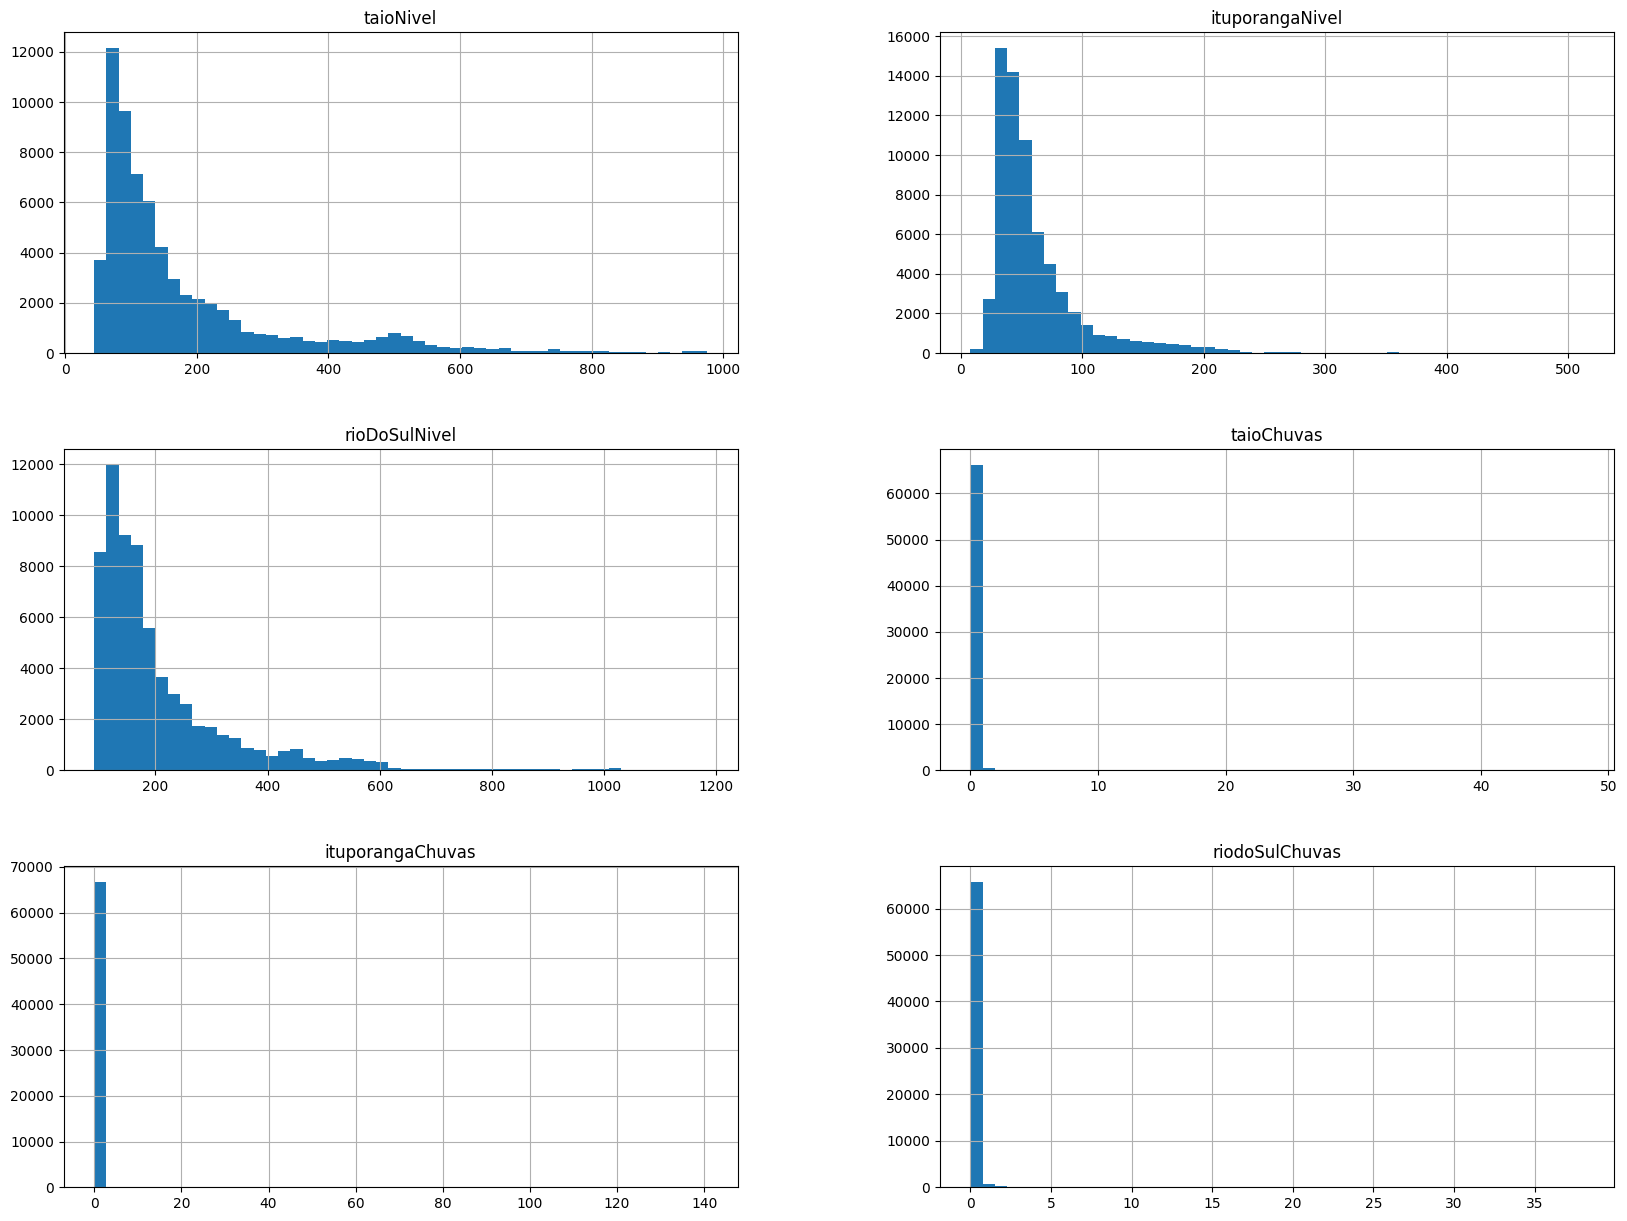

In [9]:
df_niveis_totais.hist(bins=50, figsize=(20,15))

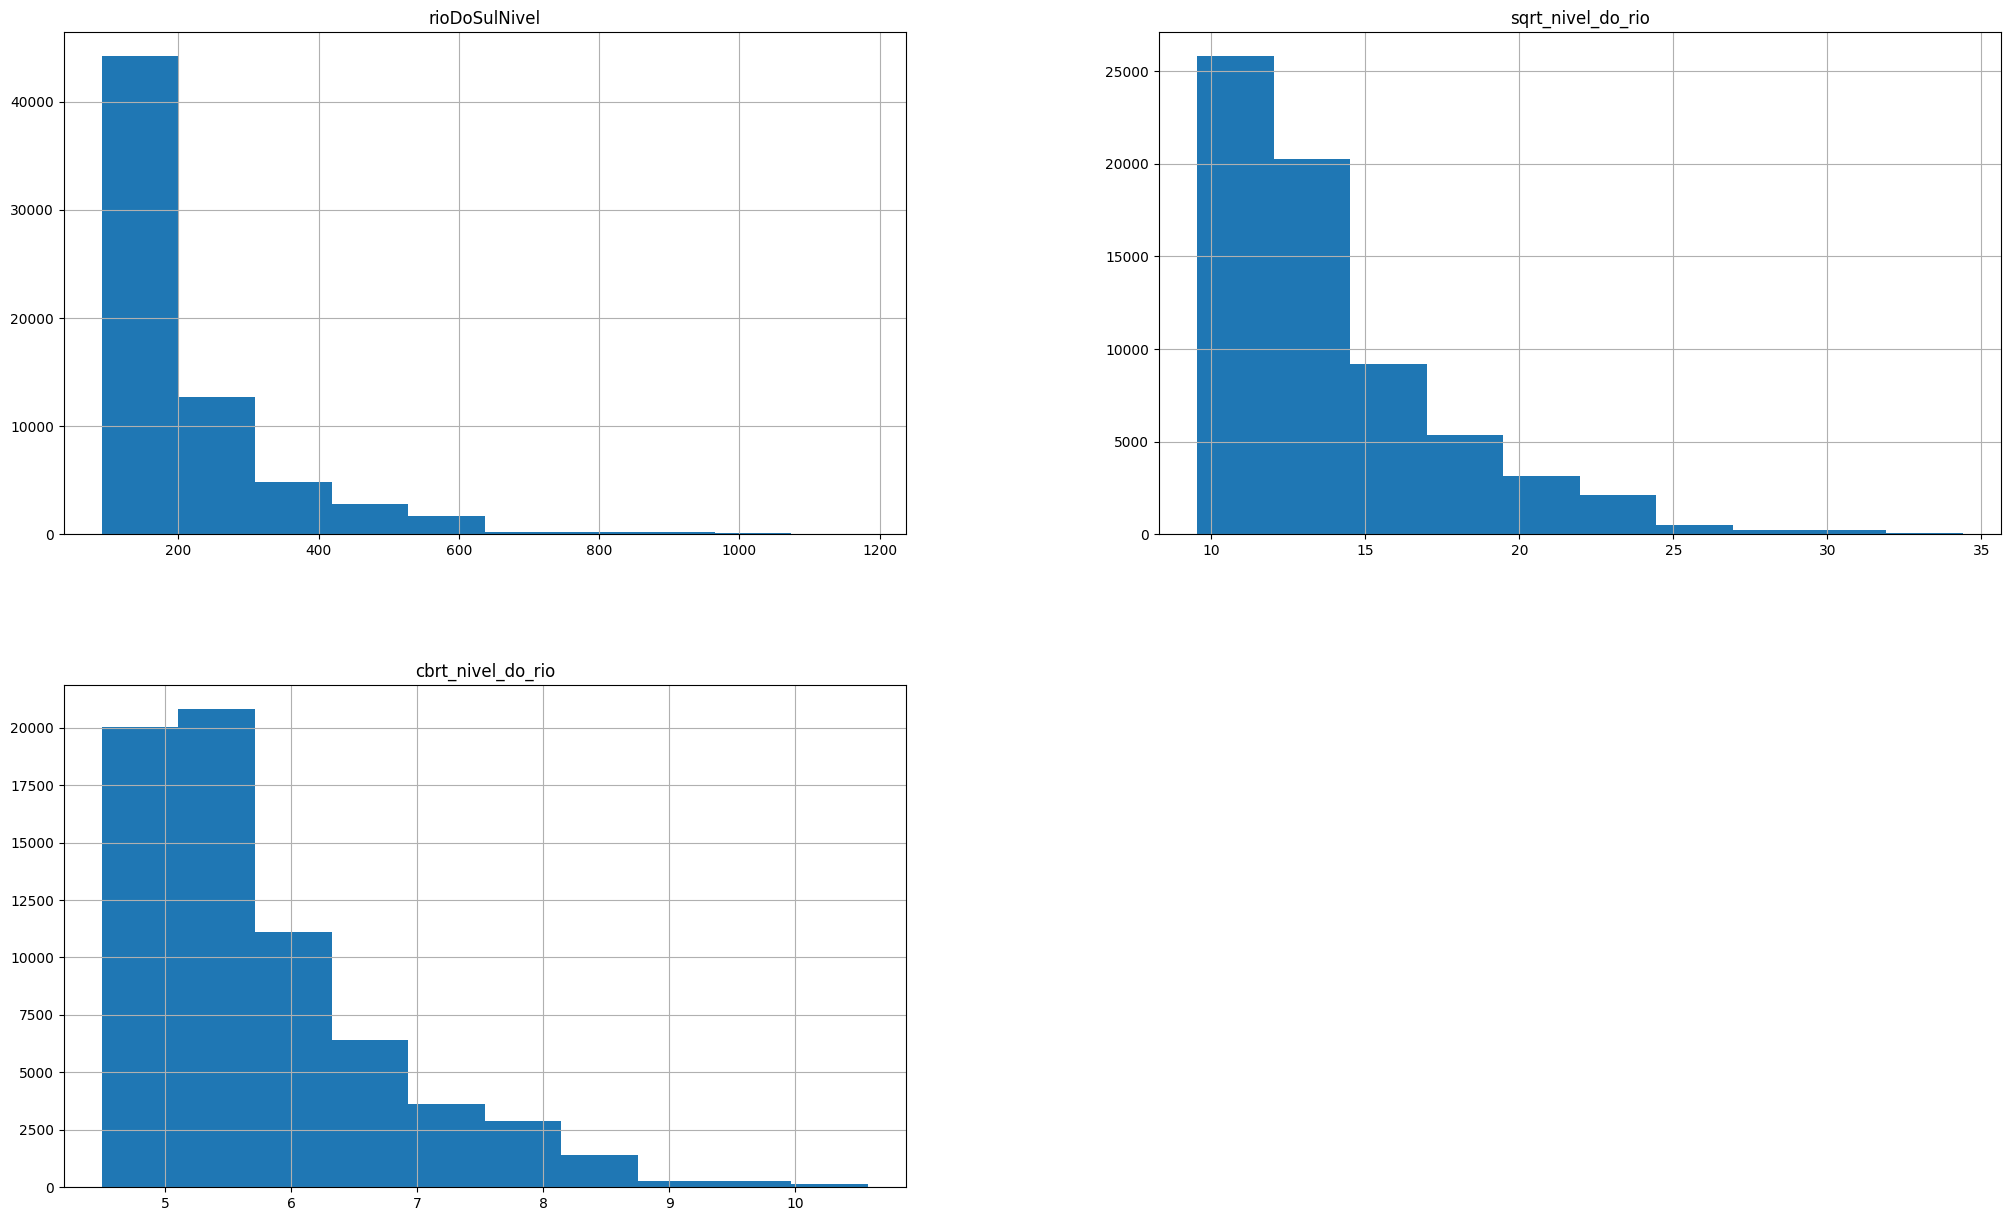

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Adicionando a coluna 'sqrt_nivel_do_rio' ao DataFrame
df_niveis_totais['sqrt_nivel_do_rio'] = np.sqrt(df_niveis_totais['rioDoSulNivel'])
df_niveis_totais['cbrt_nivel_do_rio'] = np.cbrt(df_niveis_totais['rioDoSulNivel'])

# Plotando o histograma
df_niveis_totais.hist(column=['rioDoSulNivel', 'sqrt_nivel_do_rio', 'cbrt_nivel_do_rio'], bins=10, figsize=(25,15))
plt.show()


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecionar as colunas de entrada e saída
X = df_niveis_totais[['taioChuvas', 'ituporangaChuvas', 'riodoSulChuvas', 'taioNivel', 'ituporangaNivel']]
y = df_niveis_totais['rioDoSulNivel']

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar a MLP (Multilayer Perceptron)
mlp = MLPRegressor(hidden_layer_sizes=(5, 4, 3), max_iter=1000, random_state=42)

# Treinar a MLP
mlp.fit(X_train, y_train)

# Fazer previsões
previsoes = mlp.predict(X_test)

# Avaliar o desempenho
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 919.7067127627006
R²: 0.9407192316859742


In [130]:
# Exemplo: criar um DataFrame com dados para previsão para dois dias
dados_previsao = pd.DataFrame({
    'taioChuvas': [1.2, 0.8],
    'ituporangaChuvas': [1.5, 1.0],
    'riodoSulChuvas': [1.3, 0.9],
    'taioNivel': [600, 900],
    'ituporangaNivel': [600, 900]
})

# Normalizar os dados de entrada
dados_previsao_scaled = scaler.transform(dados_previsao)

# Fazer a previsão
previsao_nivel_rio = mlp.predict(dados_previsao_scaled)

# Adicionar a previsão ao DataFrame de entrada
dados_previsao['previsao_nivel_rio'] = previsao_nivel_rio

# Visualizar o DataFrame
print(dados_previsao)


   taioChuvas  ituporangaChuvas  riodoSulChuvas  taioNivel  ituporangaNivel  \
0         1.2               1.5             1.3        600              600   
1         0.8               1.0             0.9        900              900   

   previsao_nivel_rio  
0         1043.879117  
1         1468.168642  


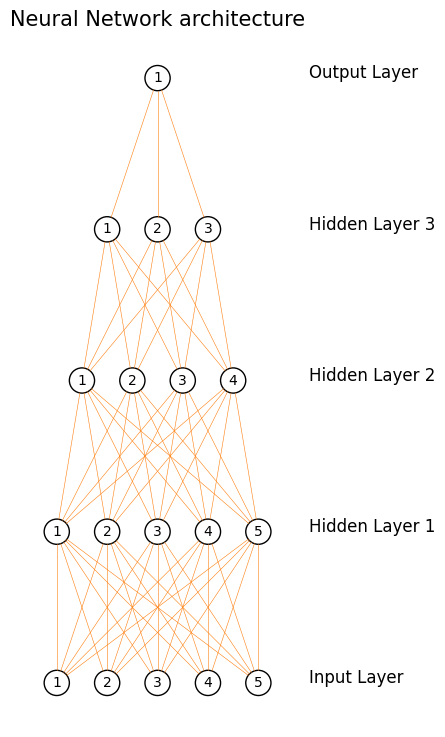

In [114]:
import VisualizeNN as VisNN
network=VisNN.DrawNN([5, 5, 4, 3, 1])
network.draw()